<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_36_Regresion_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Evaluar y realizar predicciones con un modelo de regresión lineal simple.





# Descripción

* Cargar librerias
* Cargar funciones
* Cargar datos
* Construir modelo de regresión lineal simple
* Evaluar modelo con *root mean squared error RMSE*.
* Hacer predicciones
* Interpretar el caso

# Fundamento teórico

La regresión lineal simple implica aplicar una ecuación matemática de mínimos cuadrados que permite pronosticar o predecir el valor de una variable con base en el valor de otra; este procedimiento se llama análisis de regresión.

El análisis de regresión es un método para examinar una relación lineal entre dos variables; se utiliza el concepto de correlación r
, sin embargo, la regresión proporciona mucho más información, además de permitir estimaciones o predicciones de la relación lineal con la ecuación de mínimos cuadrados (Lind, Marchal, and Wathen 2015).

De auerdo a chat gpt: La regresión lineal simple es un método estadístico utilizado para modelar la relación entre dos variables: una independiente (predictora) y una dependiente (respuesta). La relación se representa mediante una línea recta, cuya ecuación es $𝑦=𝑚𝑥+a$, donde 𝑦 es la variable dependiente, 𝑥 es la variable independiente, 𝑚 es la pendiente de la línea, y
$a$ es la intersección con el eje 𝑦.

Este modelo ayuda a predecir valores de
𝑦 basados en valores de 𝑥 y a entender la relación entre las dos variables.

Fórmula de mínimos cuadrados:

$$
Y = a + bx \text{  o bien } \\ Y = β_0 + β_1 \cdot x_i
$$

* $Y$ Es el valor de una predicccón
* $a$ o $β_0$ es el coeficiente de la abcisa
* $b$ o $β_1$ es el valor de la pendiente de la recta de regresión
* $x_i$ son los valores de la variable independiente $x$ que permiten hacer prediciones.



## Métricas de evaluación

El modelo basado en la formula anterior, se acepta si el valor de *r square* sobrepasa el $50$% tanto con los datos de entrenamiento como con los datos de validación.

La métrica *root mean square error (RMSE)* significa que tanto varía las predicciones con respecto a los datos reales se deberá comparar con otros modelos y los mismos datos para evaluar su rendimiento.



## Crear datos de entrenamiento y validación

* Los datos de entrenamiento serán aleatoriamente el 70% de los datos originales.
* Los datos de validación o prueba (test) serán aleatoriamente el complemento del 30%.
* Los datos de entrenamiento y datos de validación deben
set mutuamente excluyentes que signifia que están en uno conjunto o están en el otro.

Ahora que se tiene la variable independiente estaturas y la variable dependiente pesos, el siguiente paso es dividir estos datos en conjuntos de entrenamiento y prueba o validación.

Se utiiza el método *train_test_split()* que forma parte de la librería Scikit-Learn para dividir los datos en entrenamiento y validación.

El argumento *test_size* establece el 30% para datos de validación por lo que el $70$% pertenece a los datos de entrenamiento y el resto a datos de validación o prueba.

# Desarrollo



## Cargar librerías



In [79]:
import pandas as pd
import numpy as np
from collections import Counter as Counter
import math
from sklearn.linear_model import LinearRegression # Para contruir el modelo

import matplotlib.pyplot as plt # Para visualizar datos
from sklearn.model_selection import train_test_split # Para partir los datos

from sklearn import metrics # Para determinar métricas.
from sklearn.metrics import r2_score, mean_squared_error

## Cargar funciones



In [98]:
# Función que devuelve las medias aritméticas y desviaciones estándar de dos variables numéricas de una muestra
def f_medias (independiente, dependiente):
  medias = [np.mean(independiente), np.mean(dependiente)]
  return medias

# Función que devuelve las desviaciones estándar de dos variables numéricas de una muestra
def f_desviaciones_std (independiente, dependiente):
  desviaciones = [np.std(independiente, ddof=1), np.std(dependiente, ddof=1)]
  return desviaciones

# Función que devuelve la covarianza y correlación de Pearson y r square de dos variables numéricas de una muestra
def f_cov_corr(X, Y):
    # Calcular la covarianza
    covar = np.cov(X.T, Y.T)[0, 1]

    # Calcular la correlación de Pearson
    r = np.corrcoef(X.T, Y.T)[0, 1]

    # Calcular el coeficiente de determinación (R^2)
    #r_square = r**2

    return covar, r #, r_square


# Función que visualzia la dispersión de dos variables numéricas
# Recibe las variable numéricas y el conteto de cada una de ellas
def f_dispersion (x, y, x_nombre, y_nombre):
  medias = f_medias(x, y)

   # Crear el diagrama de dispersión
  plt.scatter(x, y, s = 5)

  # Etiquetas y título
  plt.xlabel(x_nombre)
  plt.ylabel(y_nombre)
  plt.title('Diagrama de Dispersión')
  plt.axvline(x=medias[0], color='blue', linestyle='--', linewidth=0.5,
            label="Media "+ x_nombre + ":" + str(np.round(medias[0], 2)))
  plt.axhline(y=medias[1], color='green', linestyle='--', linewidth=0.5,
            label="Media "+ y_nombre+":" + str(np.round(medias[1], 2)))
  plt.legend()
  # Mostrar el diagrama de dispersión
  plt.show()

# Esto debe ser una función que visualiza recta de regresión lineal
def f_regresion_linea_tendencia(modelo, datos_entrenamiento, x_contexto, y_contexto):
    # Extraer los datos de entrenamiento
    X_entrenamiento = datos_entrenamiento.iloc[:, 0].values.reshape(-1, 1)
    Y_entrenamiento = datos_entrenamiento.iloc[:, 1].values

    # Calcular los coeficientes del modelo
    a = modelo.intercept_  # El valor de la intersección de la abcisa
    b = modelo.coef_[0]    # El valor de la pendiente

    # Hacer predicciones con el modelo
    linea_tendencia = modelo.predict(X_entrenamiento)

    # Datos de covarianza y correlación con los valores de entrenamiento
    covar, r  = f_cov_corr(X_entrenamiento, Y_entrenamiento)

    # Graficar los datos y la regresión lineal
    plt.scatter(X_entrenamiento, Y_entrenamiento, color='blue', s=5)
    plt.plot(X_entrenamiento, linea_tendencia, color='red', linewidth=0.5,
             label=f'a = {np.round(a, 4)}; b = {np.round(b, 4)}; r = {np.round(r, 4)}')

    # Agregar etiquetas y título
    plt.xlabel(x_contexto)
    plt.ylabel(y_contexto)
    plt.title('Regresión Lineal Simple. Datos de Entrenamiento: '+x_contexto+"-"+y_contexto)
    plt.legend()
    plt.grid(True)
    plt.show()

# La función f_entrena_test() recibe las dos variables y sus conextos y
# devuelve los datos de entrenamiento y datos de validación al 70% y 30%
def f_entrena_test(X, Y, contexto_x, contexto_y):
  X_entrenamiento, X_validacion, Y_entrenamiento, Y_validacion = train_test_split(X, Y, test_size=0.3, random_state=2024)


  # Crear un DataFrame con los datos de entrenamiento
  datos_entrenamiento = pd.DataFrame({contexto_x: X_entrenamiento.flatten(), contexto_y: Y_entrenamiento})

  # Datos de entrenamiento
  print("Datos de Entrenamiento:")
  print(datos_entrenamiento)

  # Crear un DataFrame con los datos de validación
  datos_validacion = pd.DataFrame({contexto_x: X_validacion.flatten(), contexto_y: Y_validacion})

  # Datos de validación
  print("\nDatos de Validación:")
  print(datos_validacion)
  return datos_entrenamiento, datos_validacion

# La función construye el modelo con los datos de entrenamiento
def f_crear_modelo(datos_entrenamiento):
  # Crear el modelo
  modelo = LinearRegression()

  # Entrenar el modelo
  X_entrenamiento = datos_entrenamiento.iloc[:, 0].values.reshape(-1, 1)
  Y_entrenamiento = datos_entrenamiento.iloc[:, 1].values
  modelo.fit(X_entrenamiento, Y_entrenamiento)
  # Los coeficienes
  a = modelo.intercept_  # El valor de la intersección de la abcisa
  b = modelo.coef_       # El valor de la pendiente
  print ("Coeficiente a :", a)
  print ("Coeficiente b :", b)

  return modelo

# Función que recibe el modelo y los datos de prediccion y
# devuelve las prediccones en un data.frame
def f_hacer_predicciones(modelo, datos_validacion):
    # Hacer predicciones sobre el conjunto de validación
    X_validacion = datos_validacion.iloc[:, 0].values.reshape(-1, 1)
    Y_validacion = datos_validacion.iloc[:, 1].values
    Y_pred = modelo.predict(X_validacion)

    # Crear un DataFrame para comparar los valores reales y predichos
    resultados = pd.DataFrame({datos_validacion.columns[0]: X_validacion.flatten(),
                               'Valores Reales': Y_validacion,
                               'Predicciones': Y_pred})
    return resultados

def f_evaluar_modelo(resultados):
    # Calcular R-squared
    r2 = r2_score(resultados['Valores Reales'], resultados['Predicciones'])

    # Calcular Root Mean Square Error (RMSE)
    rmse = np.sqrt(mean_squared_error(resultados['Valores Reales'], resultados['Predicciones']))

    print(f"R-squared: {r2}")
    print(f"Root Mean Square Error (RMSE): {rmse}")

## Crear datos llamadas y ventas


    llamadas  ventas
0         96      41
1         40      41
2        104      51
3        128      60
4        164      61
5         76      29
6         72      39
7         80      50
8         36      28
9         84      43
10       180      70
11       132      56
12       120      45
13        44      31
14        84      30


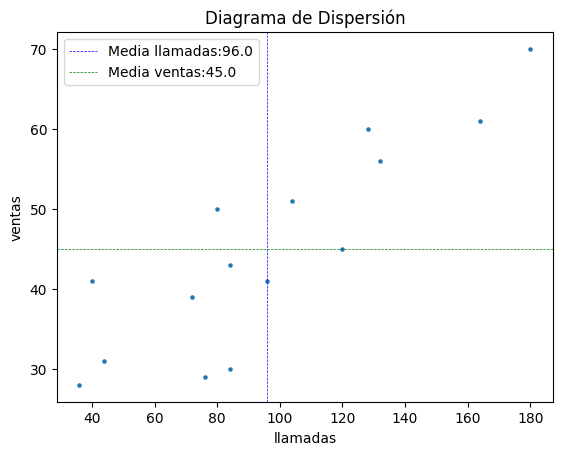

In [81]:
# Definir los datos
llamadas = np.array([96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84])
ventas = np.array([41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30])
# Crear un DataFrame de datos bivariados
datos = pd.DataFrame({'llamadas': llamadas, 'ventas': ventas})
print (datos)
f_dispersion(datos['llamadas'], datos['ventas'], "llamadas", "ventas")

### Crear datos de entrenamiento y datos de validación

Primero se identifican las variable independiente X y la variable dependiente Y del conjunto origial de los datos.

Luego con la funcion *train_test_split(X, Y, test_size=0.3, random_state=2024)* se parten los datos en datos en dos, datos de entrenamiento y datos de validación para cada variable, 70% para entrenamiento y 30% para validación; el argumento *random_state=2024* significa semilla de aleatoriedad.





In [91]:
X = datos[['llamadas']].values  # Variable independiente
Y = datos['ventas'].values  # Variable dependiente

datos_entrenamiento, datos_validacion = f_entrena_test(X, Y, "Llamadas", "Ventas")


Datos de Entrenamiento:
   Llamadas  Ventas
0       104      51
1       128      60
2        44      31
3        40      41
4        80      50
5       164      61
6       120      45
7        96      41
8       180      70
9        36      28

Datos de Validación:
   Llamadas  Ventas
0        84      43
1        72      39
2        84      30
3       132      56
4        76      29


### Crear modelo

Se manda llamar la función *f_crear_model()* con los argumetos datos de engrnamiento ydatos e validación para construir el modelo de regesion lineal simple.


In [83]:

modelo = f_crear_modelo(datos_entrenamiento)

Coeficiente a : 23.934151785714285
Coeficiente b : [0.24058315]


### Recta de regresión



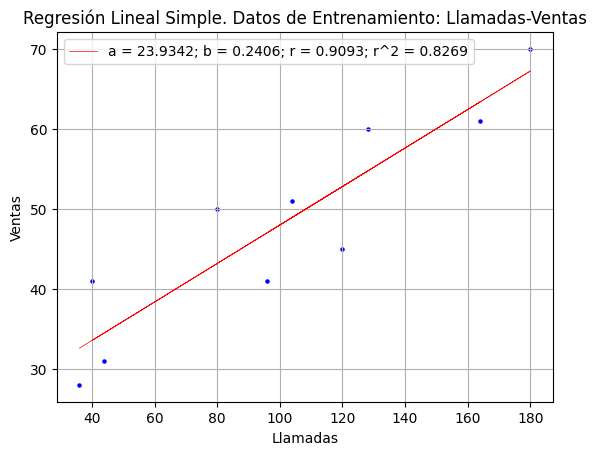

In [88]:
f_regresion_linea_tendencia(modelo, datos_entrenamiento, "Llamadas", "Ventas")


### Hacer prediciones

Con los datos de validación se hacen las predicciones. Se manda llamar la función *f_hacer_predicciones(modelo, datos_validacion)*.



In [85]:


predicciones = f_hacer_predicciones(modelo, datos_validacion)
print (predicciones)


   Llamadas  Valores Reales  Predicciones
0        84              43     44.143136
1        72              39     41.256138
2        84              30     44.143136
3       132              56     55.691127
4        76              29     42.218471


### Evaluar el modelo

El modelo se evalúa con la llamada de la función



In [86]:

f_evaluar_modelo(predicciones)

R-squared: 0.21424443799951198
Root Mean Square Error (RMSE): 8.732108550431983


El estadístico *R-squared* significa que el modelo con estos dados la variable independiente representa o explica un 21.42% a la variable dependiente, la métrica está por debajo del 50% inicialmente establecida

El estadístico *Root Mean Square Error (RMSE)* signfica que el modelo se desvía 8.77 o es el margen de error en las predicciones, estos estadístios son o buenos o malos cuando se comparan con otros modelos.

## Datos de estaturas y pesos

Solo se describen las columnas 1 y 2 de los datos. La estatura de una presona va asociada con el peso corporal.

    obs  estaturas  pesos
0     1        178     79
1     2        172     75
2     3        160     62
3     4        192    107
4     5        167     72
5     6        170     52
6     7        185     90
7     8        175     70
8     9        180     85
9    10        170     92
10   11        180     87
11   12        180     82
12   13        170     75
13   14        183     90
14   15        161     65
15   16        150     56
16   17        162     56
17   18        177     82
18   19        190     95
19   20        165     70
20   21        164     80
21   22        183     92
22   23        175     74
23   24        168     65
24   25        170     77
25   26        175     72
26   27        175     65
27   28        178     70
28   29        170     75
29   30        160     65
30   31        162     60
31   32        166     67
32   33        178     75
33   34        170     70
34   35        163     60
35   36        165     72
36   37        170     76
37   38     

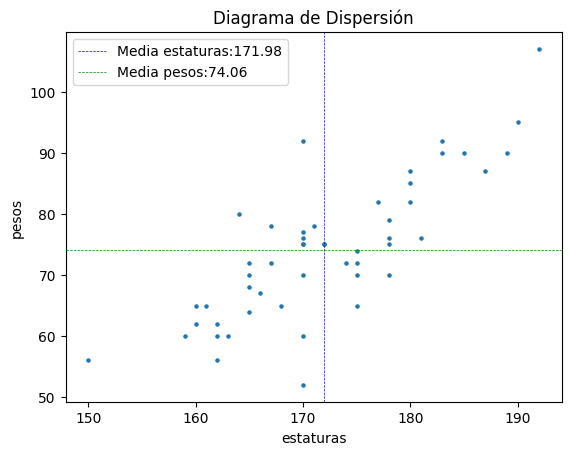

Datos de Entrenamiento:
    estaturas  pesos
0         172     75
1         170     77
2         170     70
3         174     72
4         167     72
5         165     70
6         170     52
7         159     60
8         171     78
9         165     64
10        164     80
11        185     90
12        170     92
13        168     65
14        190     95
15        175     74
16        175     70
17        162     62
18        170     75
19        180     82
20        166     67
21        178     76
22        162     60
23        167     78
24        189     90
25        160     62
26        180     87
27        165     72
28        172     75
29        170     60
30        170     76
31        178     70
32        178     79
33        178     75
34        180     85

Datos de Validación:
    estaturas  pesos
0         175     72
1         177     82
2         181     76
3         165     68
4         170     75
5         192    107
6         183     90
7         175     65
8        

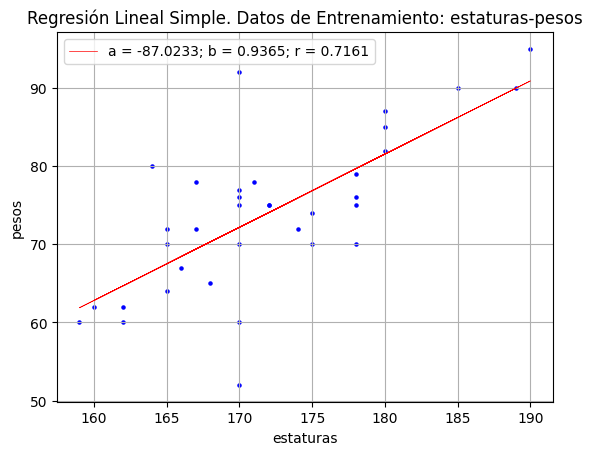

    estaturas  Valores Reales  Predicciones
0         175              72     76.857450
1         177              82     78.730372
2         181              76     82.476218
3         165              68     67.492837
4         170              75     72.175143
5         192             107     92.777292
6         183              90     84.349140
7         175              65     76.857450
8         162              56     64.683453
9         163              60     65.619914
10        150              56     53.445917
11        161              65     63.746991
12        183              92     84.349140
13        160              65     62.810530
14        187              87     88.094986
R-squared: 0.7892571456409354
Root Mean Square Error (RMSE): 6.526295719497343


In [104]:
# Cargar los datos
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2024/datos/estaturas_pesos.csv")
datos.iloc[:, [1, 2]].describe()
print (datos)

# Diagrama de dispersión
f_dispersion(datos['estaturas'], datos['pesos'], "estaturas", "pesos")

# Datos de enrenamiento y validaci´p
X = datos[['estaturas']].values  # Variable independiente
Y = datos['pesos'].values  # Variable dependiente

datos_entrenamiento, datos_validacion = f_entrena_test(X, Y, "estaturas", "pesos")

# Crear modelo
modelo = f_crear_modelo(datos_entrenamiento)

# Linea de tendencia
f_regresion_linea_tendencia(modelo, datos_entrenamiento, "estaturas", "pesos")

# Predicciones
predicciones = f_hacer_predicciones(modelo, datos_validacion)
print (predicciones)

# Evaluar el modelo
f_evaluar_modelo(predicciones)



## Años de experiencia y salario



     years_experience     salary
0                4.60   66228.63
1                6.05   82864.99
2                9.57  115587.22
3                6.37   86050.69
4                2.82   55510.70
..                ...        ...
495              3.43   59651.48
496             10.26  120788.10
497              3.79   61684.19
498              3.24   58560.85
499              2.06   44332.17

[500 rows x 2 columns]


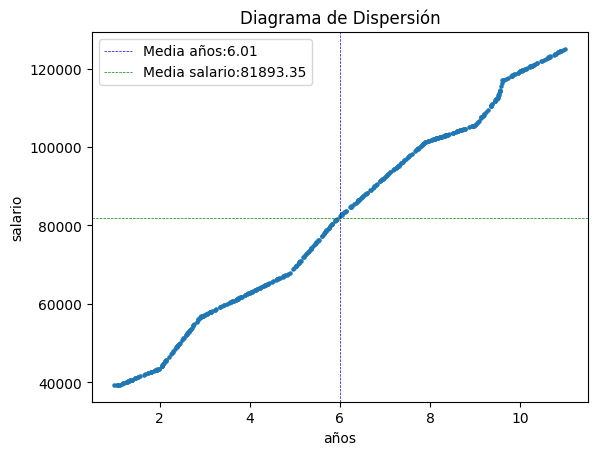

Datos de Entrenamiento:
     años    salario
0    8.75  104601.94
1    5.68   78439.23
2    7.66   98951.26
3    2.05   44222.21
4    6.95   91855.06
..    ...        ...
345  3.06   57539.35
346  9.82  118264.86
347  5.37   74249.72
348  1.74   42294.68
349  6.99   92268.85

[350 rows x 2 columns]

Datos de Validación:
      años    salario
0     8.24  102630.68
1     2.50   50804.74
2     2.39   49151.29
3     8.59  103976.19
4     2.44   49867.83
..     ...        ...
145   6.01   82422.61
146   9.54  114393.23
147  10.46  121928.31
148   9.35  110479.54
149   6.95   91817.96

[150 rows x 2 columns]
Coeficiente a : 27692.614468753796
Coeficiente b : [9007.74452807]


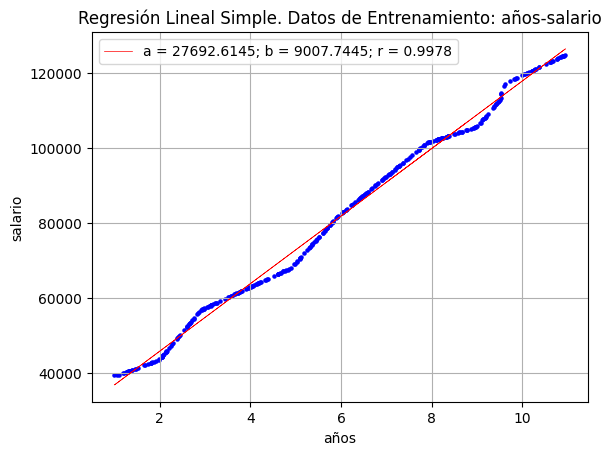

      años  Valores Reales   Predicciones
0     8.24       102630.68  101916.429380
1     2.50        50804.74   50211.975789
2     2.39        49151.29   49221.123891
3     8.59       103976.19  105069.139965
4     2.44        49867.83   49671.511117
..     ...             ...            ...
145   6.01        82422.61   81829.159082
146   9.54       114393.23  113626.497267
147  10.46       121928.31  121913.622232
148   9.35       110479.54  111915.025806
149   6.95        91817.96   90296.438939

[150 rows x 3 columns]
R-squared: 0.9962220725536801
Root Mean Square Error (RMSE): 1632.2525260646908


In [109]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2024/datos/agnios_ingresos.csv")
datos = np.round(datos, 2)
datos.describe()
print (datos)

# Diagrama de dispersión
f_dispersion(datos['years_experience'], datos['salary'], "años", "salario")

# Datos de enrenamiento y validaci´p
X = datos[['years_experience']].values  # Variable independiente
Y = datos['salary'].values  # Variable dependiente

datos_entrenamiento, datos_validacion = f_entrena_test(X, Y, "años", "salario")

# Crear modelo
modelo = f_crear_modelo(datos_entrenamiento)

# Linea de tendencia
f_regresion_linea_tendencia(modelo, datos_entrenamiento, "años", "salario")

# Predicciones
predicciones = f_hacer_predicciones(modelo, datos_validacion)
print (predicciones)

# Evaluar el modelo
f_evaluar_modelo(predicciones)


# Interpretación

* Con los datos de llamadas y ventas se generan los estadísticos sigientes: R-squared: 0.21
Root Mean Square Error (RMSE): 8.7321 que significa que el modelo es eficiente al 21% aproximadamente y que su margen de error media es 8.73.

* Con los datos de estaturas y pesos, los etadísticos resultantes fueron: R-squared: 0.78
Root Mean Square Error (RMSE): 6.5262. significa que el modelo de regresión lineal simple la variable independiente llamadas explica un 78% aproximadamente a la variable dependiente ventas. Su margen de error medio varía con 6.5262. El modelo es eficiente con estos datos por encima de la métrica del 50% establecida inicialmente.

* Con los datos de años de experiencia y salario, los estadísticos para evaluación fueron: *R-squared: 0.99* y *Root Mean Square Error (RMSE): 1632.2525*. Significa que el modelo la variable independiente años de experiencia representa un 99% a la variable salario y que el modelo tiene un margen de error en las prediccione de 1632.25 aproximadamente.

* Hay otros datos ....





# Bibliografía

* Amat Rodrigo, Joaquín. 2016. “Correlación Lineal y Regresión Lineal Simple.” 2016. https://www.cienciadedatos.net/documentos/24_correlacion_y_regresion_lineal.
* OpenAI. (2024, Mayo 28). Respuesta generada por ChatGPT [Respuesta a consulta]. Obtenido de https://www.openai.com/chatgpt
* Hernández Sampieri, Roberto, Carlos Fernández Collado, and María del Pilar Baptista Lucio. 2014. Metodología de La Investigación. Sexta.
* Lind, Douglas, William Marchal, and Samuel Wathen. 2015. Estadística Aplicada a Los Negocios y La Economía. Decimo Sexta. México, D.F.: McGraw-Hill.
* Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.
* Walpole, Ronald E., Raymond H. Myers, Sharon L. Myers, and Keying Ye. 2007. Probabilidad y Estadística Para Ingeniería y Ciencias. Octava Edición. México: Pearson Education.